In [1]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/country-vaccinations/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [2]:
#to count the number of rows in the dataset
df.index

RangeIndex(start=0, stop=31240, step=1)

In [3]:
#dataset columns to be deleted 
cols  = ["iso_code", "source_name", "source_website"]
df_clean = df.drop(cols, axis = 1)

In [4]:
#to check the number of null values in the columns. 
df_clean.isnull().sum()

country                                    0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
dtype: int64

In [5]:
#to drop null values in a dataframe 
df_clean = df_clean.dropna(axis = 0, how = 'any')
df_clean.isnull().sum()

country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

In [6]:
#to check the datatypes of the columns 
df_clean.dtypes

country                                 object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
dtype: object

In [7]:
wales = df_clean[df_clean["country"] == 'Wales']
israel = df_clean[df_clean["country"] == 'Israel']

array([[<AxesSubplot:title={'center':'daily_vaccinations'}>]],
      dtype=object)

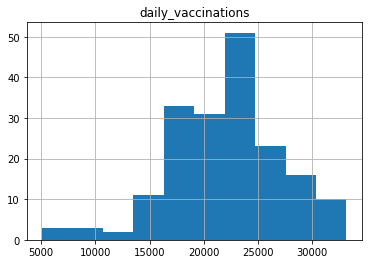

In [8]:
wales.head()
wales.hist(column = "daily_vaccinations")

array([[<AxesSubplot:title={'center':'daily_vaccinations'}>]],
      dtype=object)

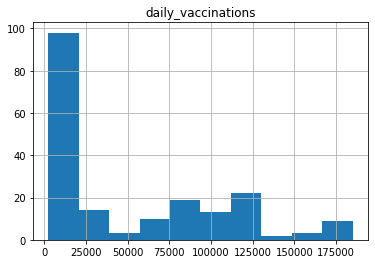

In [9]:
israel.hist(column="daily_vaccinations")

Since, histogram for wales is skewed towards right, one can assume that wales is vaccinating a larger no of people daily as compared to Israel. However, taking a look at x-axis one can see the range for wales is 5k-35k and for that of Israel is 0-175k, which is much more than that of wales. Hence Israel can said to have larger daily vacccinations as compared to Wales

<AxesSubplot:>

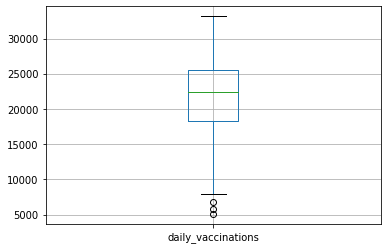

In [10]:
wales.boxplot(column =["daily_vaccinations"])

<AxesSubplot:>

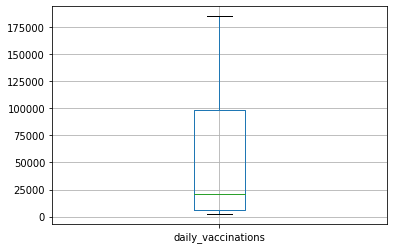

In [11]:
israel.boxplot(column = "daily_vaccinations")

The boxplot for Wales shows prescence of outliers which needs to be removed. 

In [12]:
#to find coorelation between daily vaccinations of Wales and Israel. 
import matplotlib.pyplot as plt 
import seaborn as sns 

corr = df_clean.corr()
print(corr)

                                     total_vaccinations  people_vaccinated  \
total_vaccinations                             1.000000           0.985289   
people_vaccinated                              0.985289           1.000000   
people_fully_vaccinated                        0.937464           0.864453   
daily_vaccinations_raw                         0.760066           0.812482   
daily_vaccinations                             0.822020           0.875338   
total_vaccinations_per_hundred                 0.173260           0.139610   
people_vaccinated_per_hundred                  0.178618           0.152573   
people_fully_vaccinated_per_hundred            0.167146           0.124020   
daily_vaccinations_per_million                 0.056132           0.050887   

                                     people_fully_vaccinated  \
total_vaccinations                                  0.937464   
people_vaccinated                                   0.864453   
people_fully_vaccinated    

<AxesSubplot:>

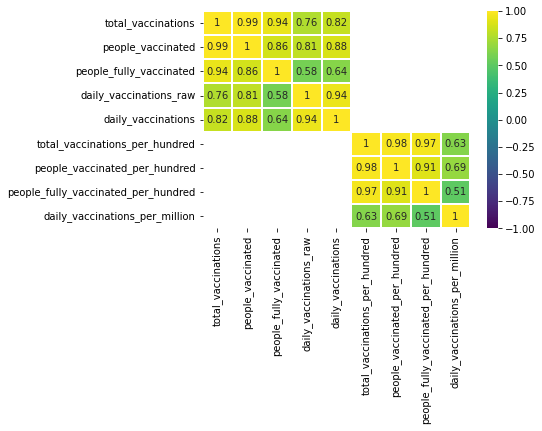

In [13]:
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot= True, linewidths = 0.1, vmin = -1, cmap = 'viridis')

As can be seen from the coorelation matrix, number of people vaccinated and total number of vaccinations has a coorelation of 0.99, which is obvious. More the number of people vaccinated, the total count will be more. 

In [14]:
import plotly.express as px 

countries = df_clean.country.unique()
total_vacc = df_clean.groupby(['country'])['total_vaccinations'].sum()

#print(total_vacc[3])
fig = px.bar(x= countries, y = total_vacc, width=3000, height=400)
fig.show()

    

Now lets try to analyze the vaccinations for all the countries by visualization so that we can determine the countries having lowest and highest number of vaccinations. 

As can one see, the maximum number of vaccinations done are in the U.S.A. Now ,let's try to pick out top ten countries with maximum number of covid vacciantions done. 

In [15]:
zipped = list(zip(countries, total_vacc))
df_vacc_total = pd.DataFrame(zipped, columns=['Country_name', 'Vaccination'])
sorted_df = df_vacc_total.sort_values(by = ['Vaccination'], ascending = False)
sorted_df.head(10)



,Country_name,Vaccination
139,United States,3.261102e+10
58,India,2.159900e+10
138,United Kingdom,7.839957e+09
37,England,6.476860e+09
46,Germany,5.473729e+09
16,Brazil,5.105921e+09
42,France,4.047035e+09
134,Turkey,3.839556e+09
64,Italy,3.812961e+09
106,Russia,2.981897e+09
